# 聚合条形图

In [1]:
from doc.Plot.require import *
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

1.23.5
2.0.0
3.7.1
0.12.2


D:\code\platform\Deep-Learning-Framework\doc\Plot\require.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


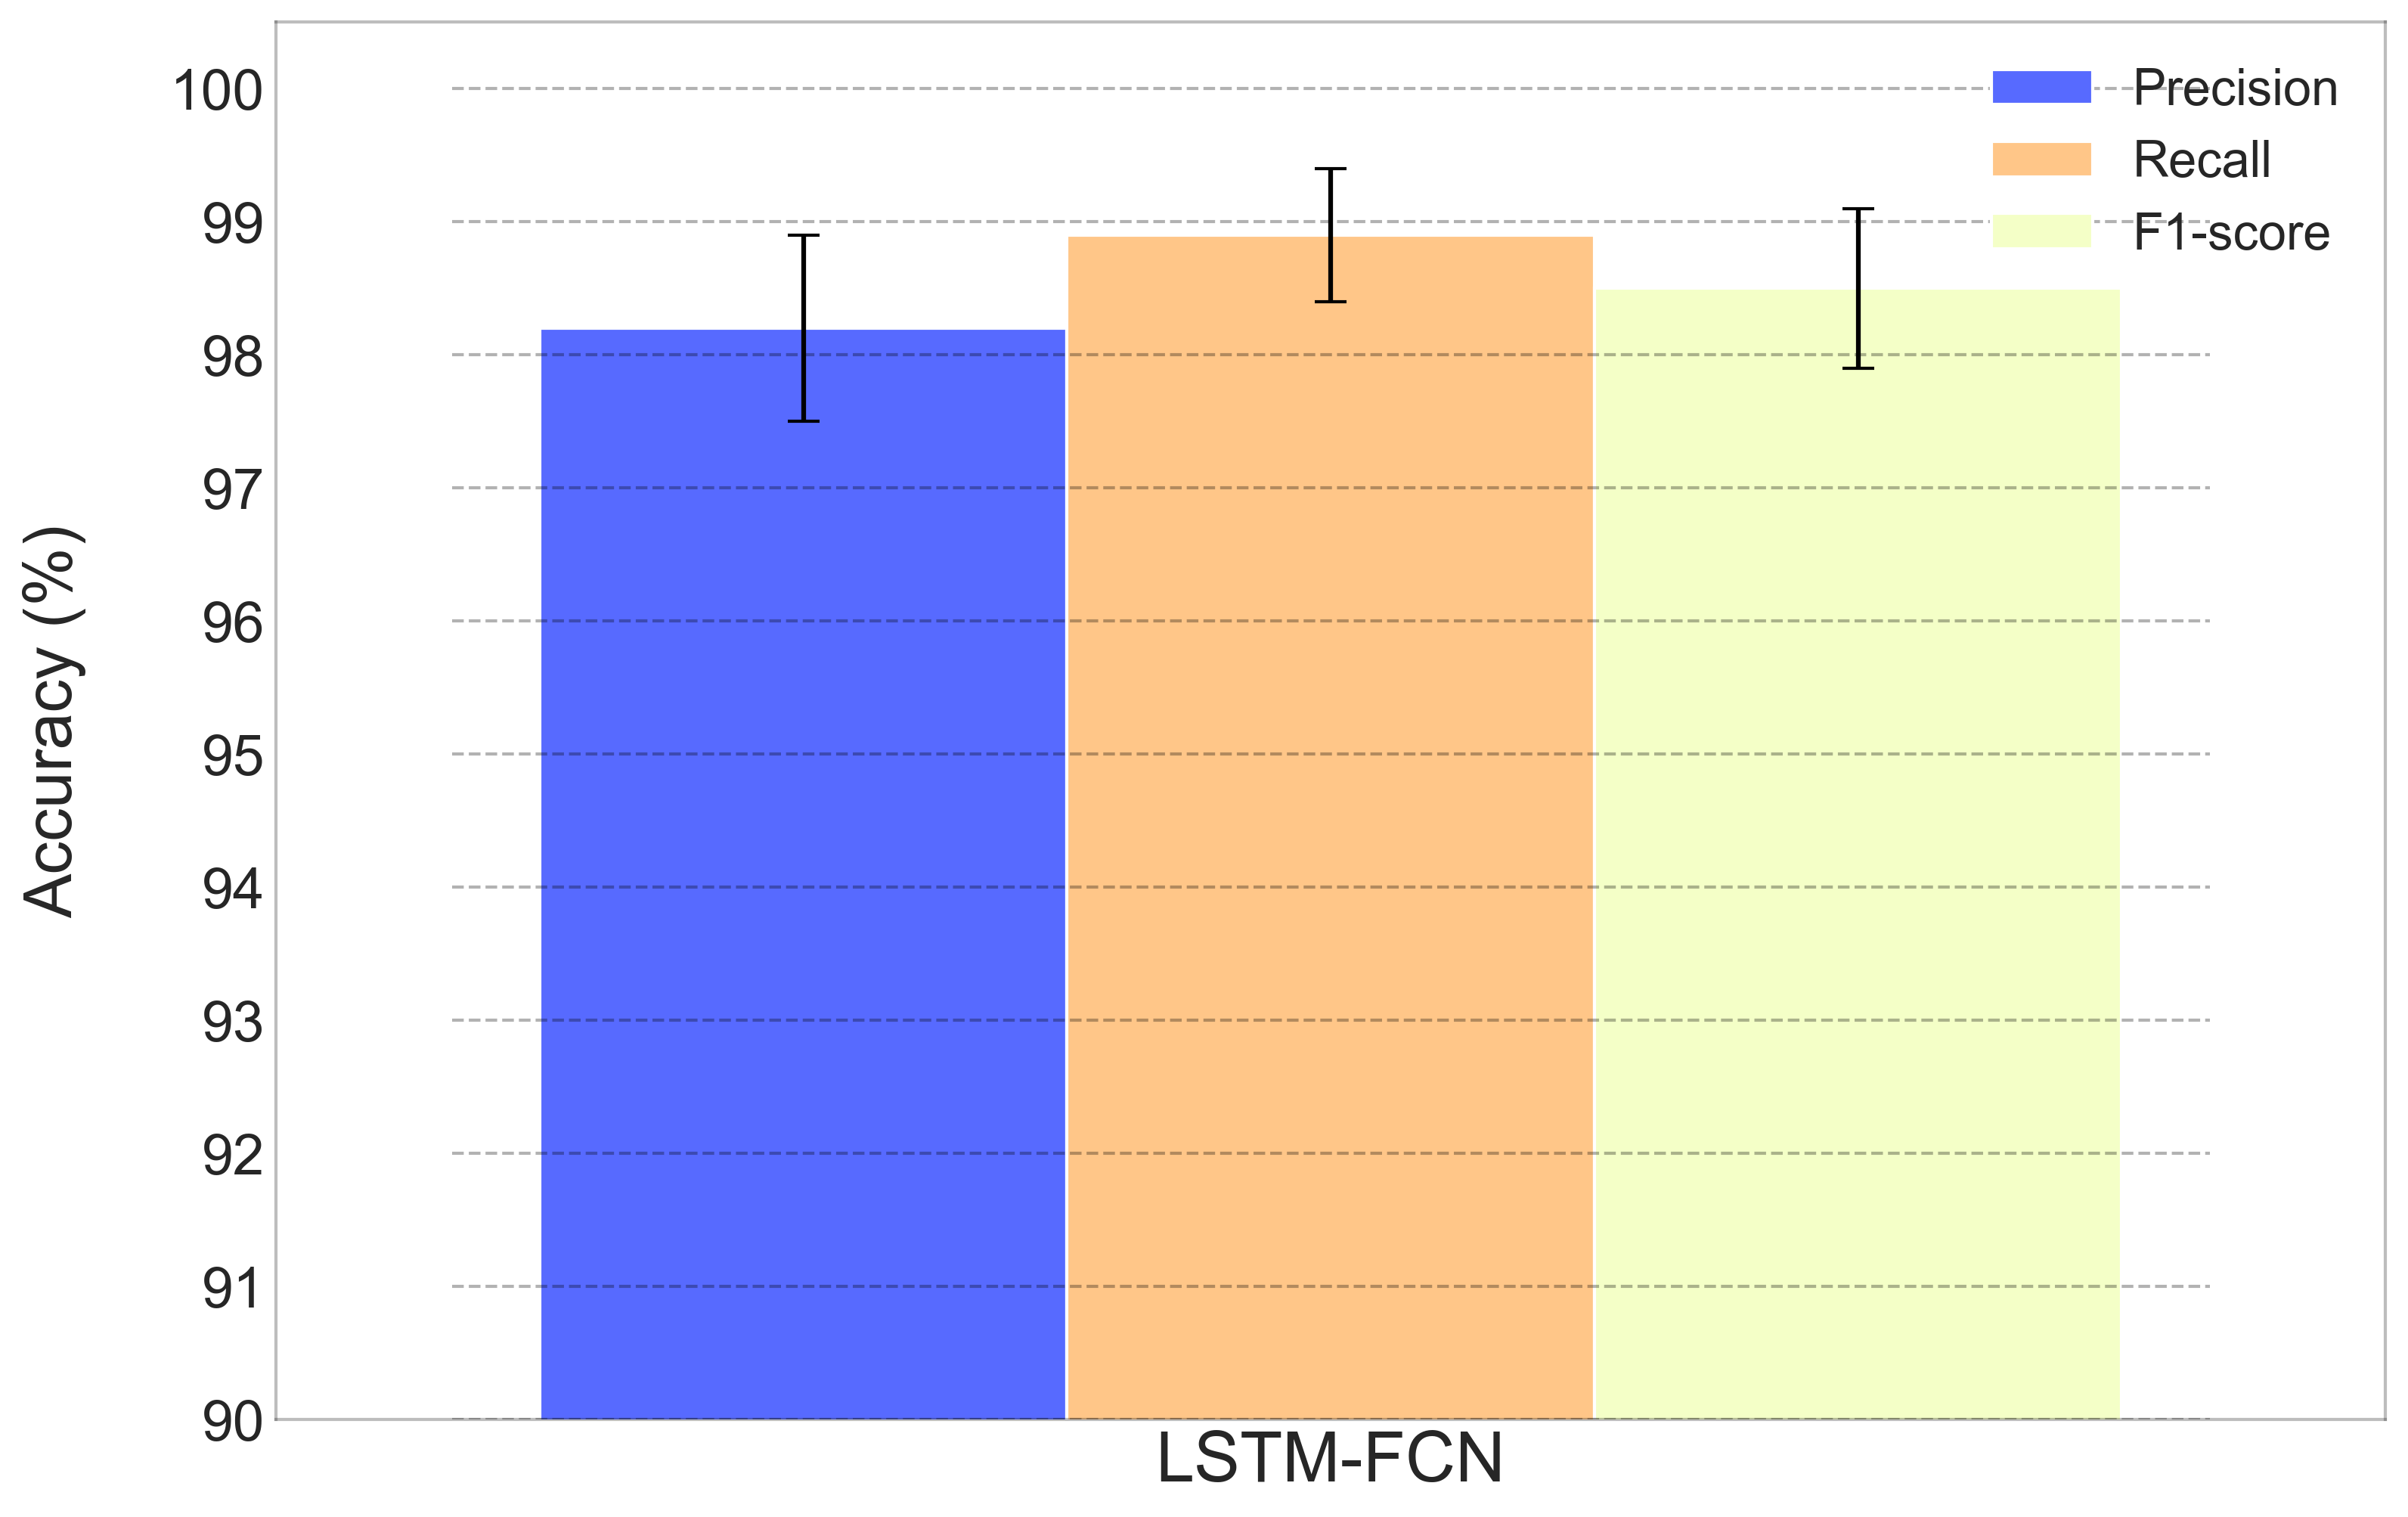

In [4]:
# pre, rec, f1
data = pd.DataFrame([
    [98.2, 98.9, 98.5],
], columns=['Precision', 'Recall', 'F1-score'], index=['LSTM-FCN'])
error = pd.DataFrame([
    [0.7, 0.5, 0.6],
], columns=['Precision', 'Recall', 'F1-score'], index=['LSTM-FCN'])
bar_width = 0.1
width = 0.4
y_LL = 90
y_UL = 101
y_interval = 1
my_colors = ['#576aff', '#ffc688', '#f4ffc7', 'tab:red', 'tab:brown']
my_line_style = ['-', '--', '-.', ':', '-']
my_marker_style = ['o', '*', 's', 'D', 'P']

x = []
for i in range(0,len(data)):
    temp = []
    for j in range(len(data.columns)):
        temp.append(i * width + j * bar_width)
    x.append(temp)
x = np.array(x).T
data = data.T
error = error.T

# Draw Plot and Annotate
fig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=300)

for label in data.index:
    plt.bar(x[data.index.get_loc(label)], data.loc[label], width=bar_width, label=label, color=my_colors[data.index.get_loc(label)])
    plt.errorbar(x[data.index.get_loc(label)], data.loc[label],
                 yerr=error.loc[label], fmt='none', ecolor='k', capsize=5)
# Decorations
plt.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False,
                labelleft=True)

# Draw Tick lines
for y in range(y_LL, y_UL, y_interval):
    plt.hlines(y, xmin=-x[0][0] - bar_width*2/3, xmax=x[-1][-1] + bar_width*2/3, colors='black', alpha=0.3, linestyles="--", lw=1)

# Lighten borders
plt.gca().spines["top"].set_alpha(0.3)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.3)
plt.gca().spines["left"].set_alpha(0.3)
plt.gca().yaxis.set_label_coords(-0.09, 0.5)
plt.gca().xaxis.set_label_coords(0.5, -0.09)

plt.ylabel('Accuracy (%)', fontsize=21)

# 横坐标
plt.xticks(x[0] + bar_width, data.columns, fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval),fontsize=18)
plt.ylim(y_LL, y_UL-0.5)
plt.xlim(-x[0][0] - bar_width, x[-1][-1] + bar_width)

plt.legend(fontsize=16, loc='upper right')
# plt.show()
plt.savefig("../img/聚合条形图.png", dpi = 300)